In [1]:
import numpy as np

from ipywidgets import interact
from matplotlib import pyplot as plt
from scipy import optimize

%matplotlib inline

# Q1

Empirical (maximum likelihood) fit for Class 1:
Probability: 0.7143
Mean: 0.2600
Standard Deviation: 0.1287

Empirical (maximum likelihood) fit for Class 2:
Probability: 0.2857
Mean: 0.8625
Standard Deviation: 0.1109


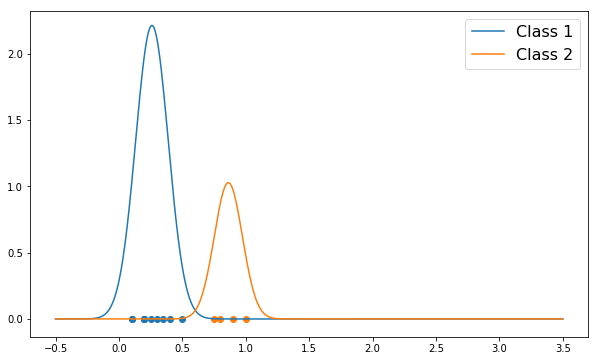

In [2]:
def univariate_gaussian_pdf(x, mu, sigma):
    return (1 / (np.sqrt(2 * np.pi * sigma**2))) * np.exp(-0.5 * ((x - mu) / sigma)**2)

class_1_data = np.array([0.5, 0.1, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.35, 0.25])
class_2_data = np.array([0.9, 0.8, 0.75, 1.0])

n_class_1 = len(class_1_data)
n_class_2 = len(class_2_data)
n_total_data = n_class_1 + n_class_2

prob_class_1 = n_class_1 / n_total_data
prob_class_2 = n_class_2 / n_total_data

class_1_mean = class_1_data.mean()
class_1_std = class_1_data.std(ddof=1)

class_2_mean = class_2_data.mean()
class_2_std = class_2_data.std(ddof=1)

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
x = np.linspace(-0.5, 3.5, 1000)

ax.plot(x, prob_class_1 * univariate_gaussian_pdf(x, class_1_mean, class_1_std), label='Class 1')
ax.scatter(class_1_data, np.zeros_like(class_1_data))

ax.plot(x, prob_class_2 * univariate_gaussian_pdf(x, class_2_mean, class_2_std), label='Class 2')
ax.scatter(class_2_data, np.zeros_like(class_2_data))

ax.legend(fontsize=16)

print('Empirical (maximum likelihood) fit for Class 1:')
print('Probability: {:.4f}'.format(prob_class_1))
print('Mean: {:.4f}'.format(class_1_mean))
print('Standard Deviation: {:.4f}'.format(class_1_std))
print()
print('Empirical (maximum likelihood) fit for Class 2:')
print('Probability: {:.4f}'.format(prob_class_2))
print('Mean: {:.4f}'.format(class_2_mean))
print('Standard Deviation: {:.4f}'.format(class_2_std))

# Q3

In [3]:
def sigmoid(a):
    return 1 / (1 + np.exp(-a))

def plot_sigmoid(c=1):
    x = np.linspace(-5, 5, 100)
    y = sigmoid(c * x)
    fig, ax = plt.subplots(1, 1, figsize=(10, 6))
    ax.plot(x, y)
    ax.set_xlabel('$ x $', fontsize=16)
    ax.set_ylabel('$ \sigma(c x) $', fontsize=16)
    ax.vlines(0, 0., 1, label='Decision Boundary')
    ax.legend(fontsize=16)

interact(plot_sigmoid, c=(0.1, 10, 0.1));

interactive(children=(FloatSlider(value=1.0, description='c', max=10.0, min=0.1), Output()), _dom_classes=('wi…